In [3]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sb

In [4]:
data = pd.read_csv('../datasets/iris.csv')
data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [5]:
def principal_component_analysis(x , compo):
    x_mean = x - np.mean(x, axis = 0)
    covar = np.cov(x_mean, rowvar = False)
    eigen_values, eigen_vectors = np.linalg.eigh(covar)
    sorted_index = np.argsort(eigen_values)[::-1]
    eigen_val_sort = eigen_values[sorted_index]
    eigen_vec_sort = eigen_vectors[:,sorted_index]
    eigen_vec_subset = eigen_vec_sort[:,0:compo]
    x_reduced = np.dot(eigen_vec_subset.transpose(), x_mean.transpose()).transpose()

    return x_reduced

In [6]:
x = data.iloc[:,:-1]
y = data['Species']

x

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,1,5.1,3.5,1.4,0.2
1,2,4.9,3.0,1.4,0.2
2,3,4.7,3.2,1.3,0.2
3,4,4.6,3.1,1.5,0.2
4,5,5.0,3.6,1.4,0.2
...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3
146,147,6.3,2.5,5.0,1.9
147,148,6.5,3.0,5.2,2.0
148,149,6.2,3.4,5.4,2.3


In [7]:
y

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: Species, Length: 150, dtype: object

In [8]:
x_red = principal_component_analysis(x, 2)

<AxesSubplot:xlabel='principal_component_1', ylabel='principal_component_2'>

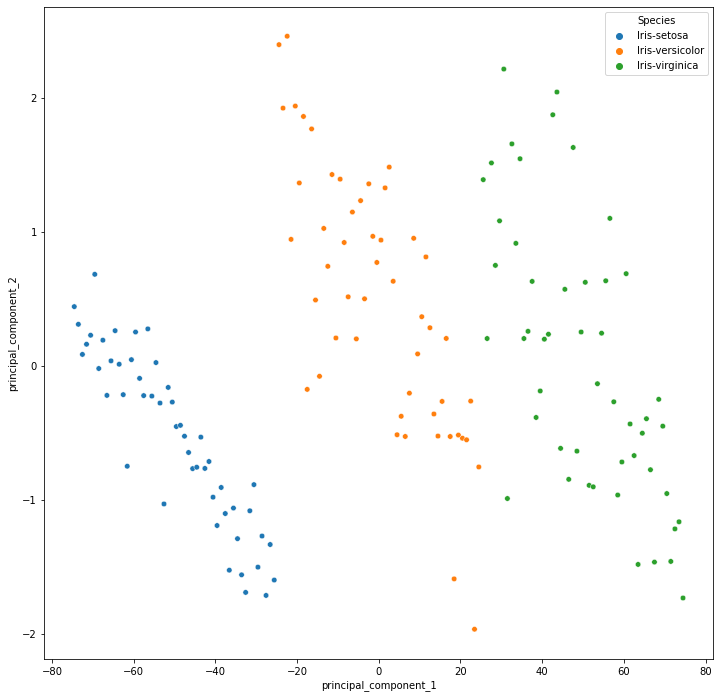

In [9]:
analyzed_data = pd.DataFrame(x_red, columns=['principal_component_1', 'principal_component_2'])
analyzed_data = pd.concat([analyzed_data, pd.DataFrame(y)], axis=1)

plt.figure(figsize=(12, 12))
sb.scatterplot(data=analyzed_data, x='principal_component_1', y='principal_component_2', hue='Species', s=30)

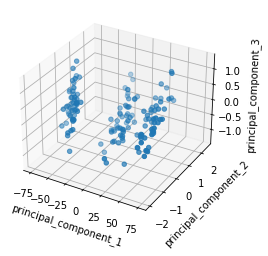

In [10]:
x_red = principal_component_analysis(x, 3)
analyzed_data = pd.DataFrame(x_red, columns=['principal_component_1', 'principal_component_2', 'principal_component_3'])
analyzed_data = pd.concat([analyzed_data, pd.DataFrame(y)], axis=1)

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')

x = analyzed_data['principal_component_1']
y = analyzed_data['principal_component_2']
z = analyzed_data['principal_component_3']

ax.set_xlabel("principal_component_1")
ax.set_ylabel("principal_component_2")
ax.set_zlabel("principal_component_3")

ax.scatter(x, y, z)

plt.show()